In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1
# Load your dataset (for example, a CSV file)
df = pd.read_csv('Energy_dataset.csv')


df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')  # Set it as the index

# Check the first few rows of the dataset
print(df.head())


                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0


In [10]:
# Generating descriptive statistics of the DataFrame
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [11]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


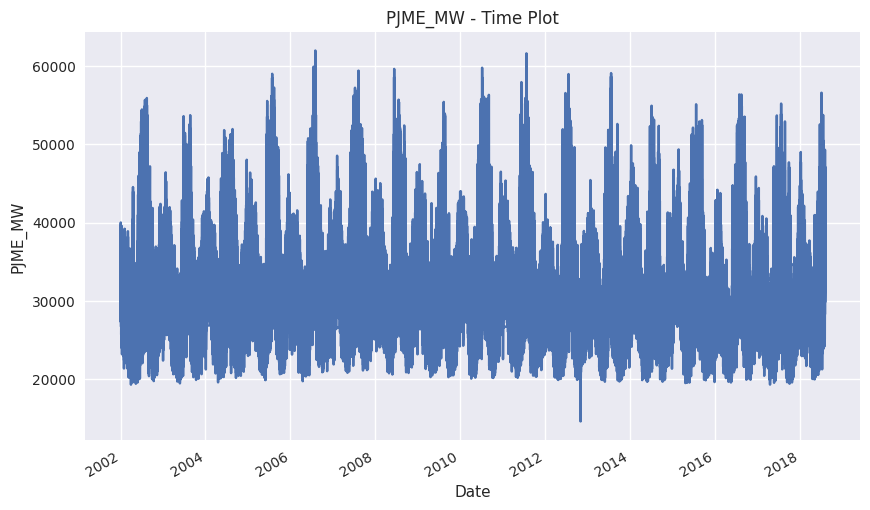

In [12]:
#Step 2
# Setting pyplot style
plt.style.use("seaborn-v0_8")

# Plotting time series
plt.figure(figsize=(10,6))
df['PJME_MW'].plot(title='PJME_MW - Time Plot')
plt.ylabel('PJME_MW')
plt.xlabel('Date')
plt.show()

The pattern showns high variability within a given year. The series is not stationary and exhibits  yearly seasonality

In [13]:
#Step 3: Seasonal Plots

df['year'] = df.index.year
df['month'] = df.index.month
df.reset_index(inplace=True)
df['week'] = df['Datetime'].dt.isocalendar().week
df['hour'] = df['Datetime'].dt.hour
df['day'] = df['Datetime'].dt.dayofweek
df['day_str'] = df['Datetime'].dt.strftime('%a')
df['year_month'] = df['Datetime'].dt.strftime('%Y_%m')
df.set_index('Datetime', inplace=True)

In [14]:
df.head()

,PJME_MW,year,month,week,hour,day,day_str,year_month
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,1,1,Tue,2002_12
2002-12-31 02:00:00,25147.0,2002,12,1,2,1,Tue,2002_12
2002-12-31 03:00:00,24574.0,2002,12,1,3,1,Tue,2002_12
2002-12-31 04:00:00,24393.0,2002,12,1,4,1,Tue,2002_12
2002-12-31 05:00:00,24860.0,2002,12,1,5,1,Tue,2002_12


/tmp/ipykernel_3489/2937067838.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(years)).colors  # Generate enough colors for each year


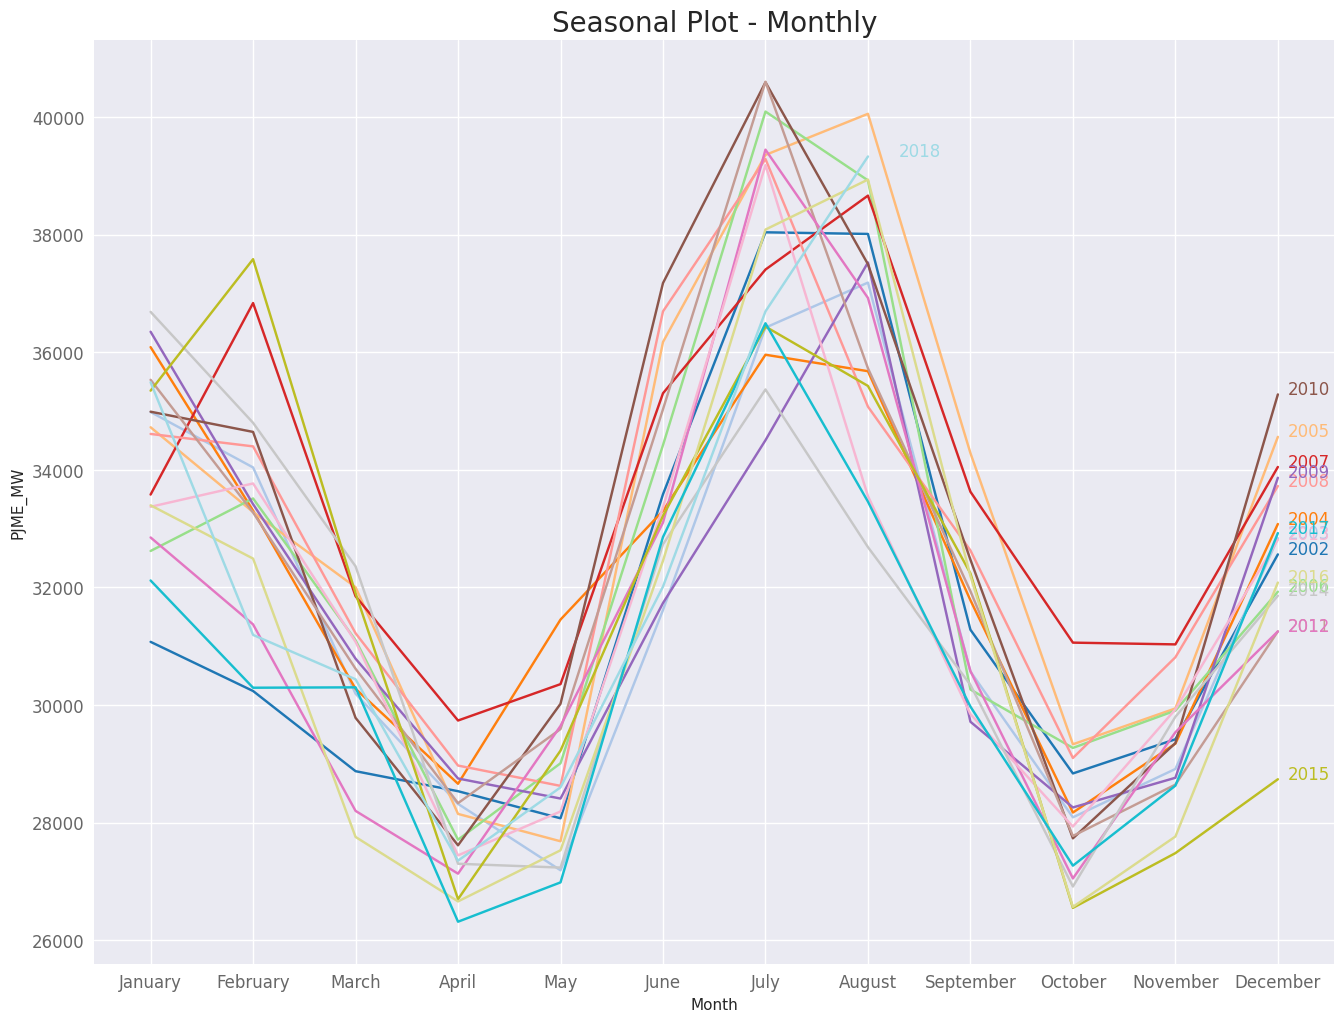

In [15]:
import calendar

# Seasonal plot — Yearly
np.random.seed(42)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = plt.cm.get_cmap('tab20', len(years)).colors  # Generate enough colors for each year

# Plotting
plt.figure(figsize=(16, 12))
for i, y in enumerate(years):
    plt.plot('month', 'PJME_MW', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
    
    # For the year 2018, place text slightly to the right
    if y == 2018:
        plt.text(df_plot.loc[df_plot.year == y, :].shape[0] + 0.3,
                 df_plot.loc[df_plot.year == y, 'PJME_MW'].iloc[-1], 
                 y, fontsize=12, color=colors[i])
    else:
        plt.text(df_plot.loc[df_plot.year == y, :].shape[0] + 0.1,
                 df_plot.loc[df_plot.year == y, 'PJME_MW'].iloc[-1], 
                 y, fontsize=12, color=colors[i])

# Setting labels and titles
plt.gca().set(ylabel='PJME_MW', xlabel='Month')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)], fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot - Monthly", fontsize=20)
plt.ylabel('PJME_MW')
plt.xlabel('Month')
plt.show()


/tmp/ipykernel_3489/2511988971.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(months)).colors  # Using a colormap from matplotlib


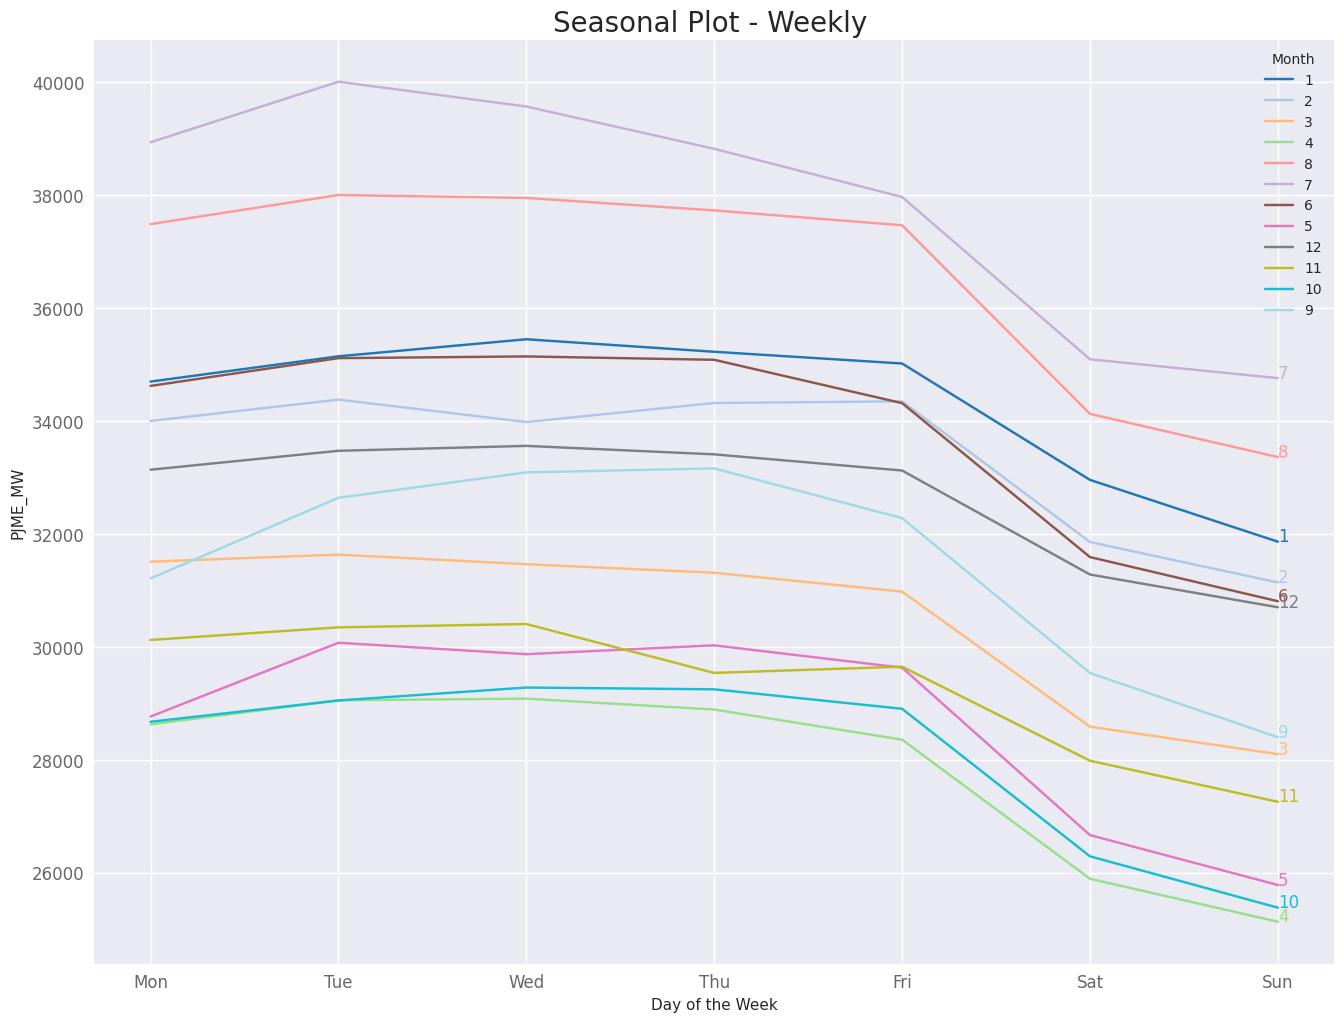

In [16]:
#Seasonal plot — Weekly
# Preparing the data
np.random.seed(42)
df_plot = df[['month', 'day_str', 'PJME_MW', 'day']].dropna()
df_plot = df_plot.groupby(['day_str', 'month', 'day']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by='day', ascending=True)

# Defining the color palette
months = df_plot['month'].unique()
colors = plt.cm.get_cmap('tab20', len(months)).colors  # Using a colormap from matplotlib

# Plotting
plt.figure(figsize=(16, 12))
for i, month in enumerate(months):
    month_data = df_plot[df_plot['month'] == month]
    plt.plot(month_data['day_str'], month_data['PJME_MW'], color=colors[i], label=month)
    plt.text(len(month_data['day_str']) - 1, month_data['PJME_MW'].iloc[-1], month, fontsize=12, color=colors[i])

# Setting labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('PJME_MW')
plt.title('Seasonal Plot - Weekly ', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month')
plt.show()


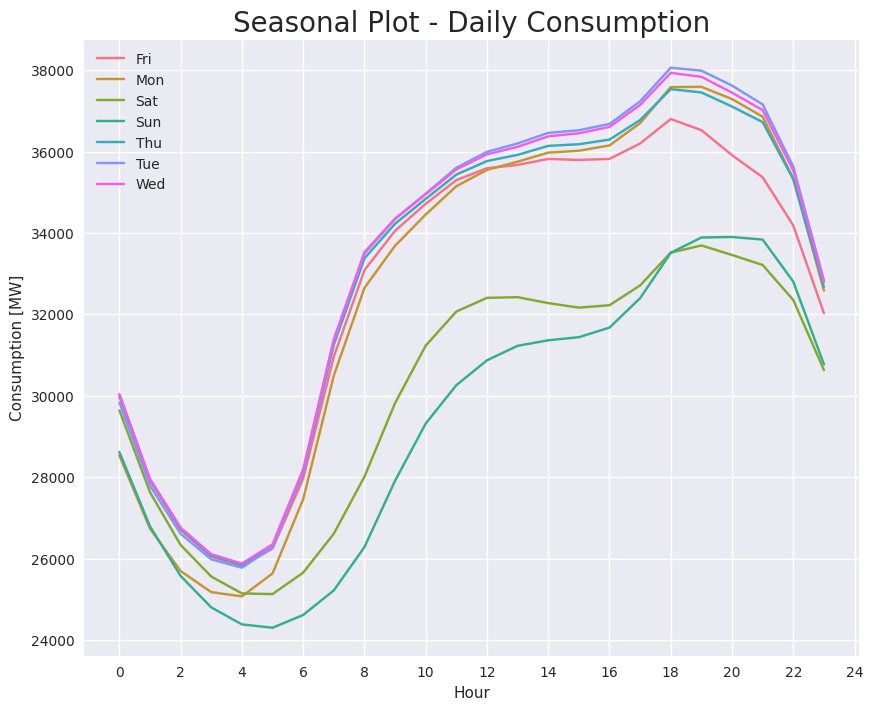

In [17]:
import seaborn as sns

# Defining the dataframe
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna().groupby(['hour', 'day_str']).mean()[['PJME_MW']].reset_index()

# Plot using Seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data = df_plot, x='hour', y='PJME_MW', hue='day_str', legend=True)
plt.locator_params(axis='x', nbins=24)
plt.title("Seasonal Plot - Daily Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')
plt.legend()

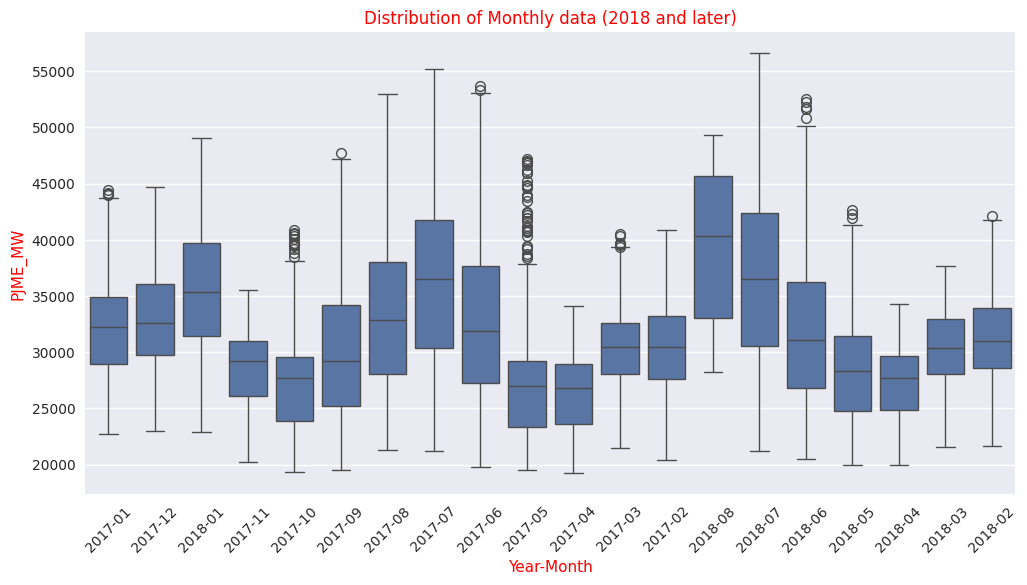

In [25]:
#Day month
# Extracting year and month features
df['year'] = df.index.year
df['month'] = df.index.month
df['year_month'] = df.index.strftime('%Y-%m')

# Filtering data for years 2023 and later
df_plot = df[df['year'] >= 2017]

# Plotting boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_month', y='PJME_MW', data=df_plot)
plt.title('Distribution of Monthly data (2018 and later)', color='red')
plt.xlabel('Year-Month', color ='red')
plt.ylabel('PJME_MW', color ='red')
plt.xticks(rotation=45)
plt.show()


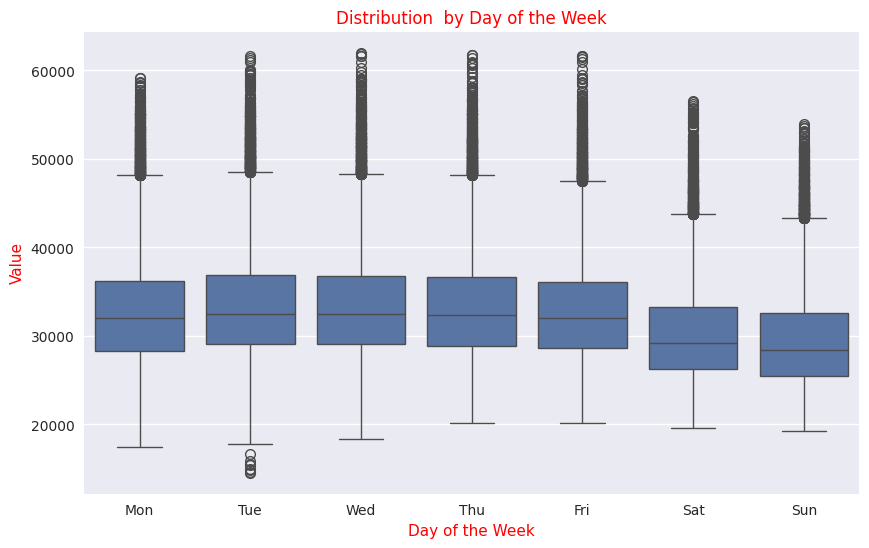

In [26]:
#Day
# Sorting the DataFrame by day of the week
df_plot = df[['day_str', 'day', 'PJME_MW']].sort_values(by='day')

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_str', y='PJME_MW', data=df_plot)
plt.title('Distribution  by Day of the Week', color ='red')
plt.xlabel('Day of the Week', color ='red')
plt.ylabel('Value', color='red')
plt.show()


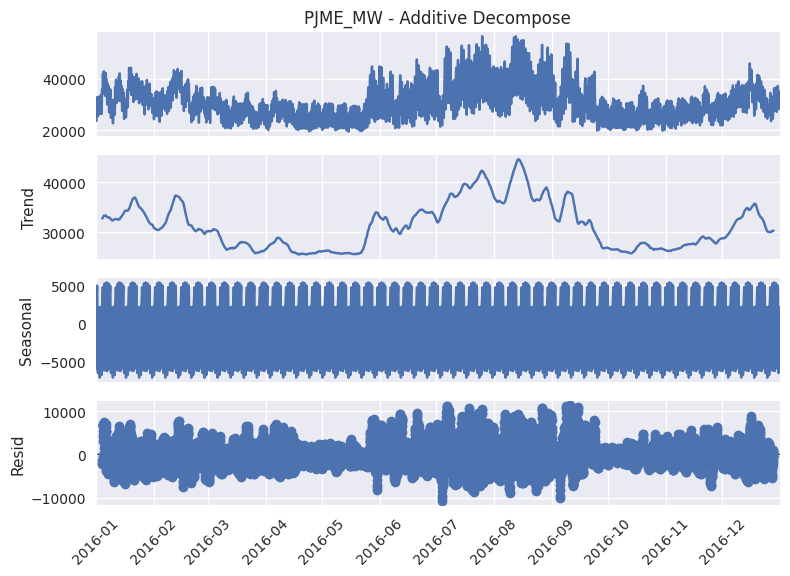

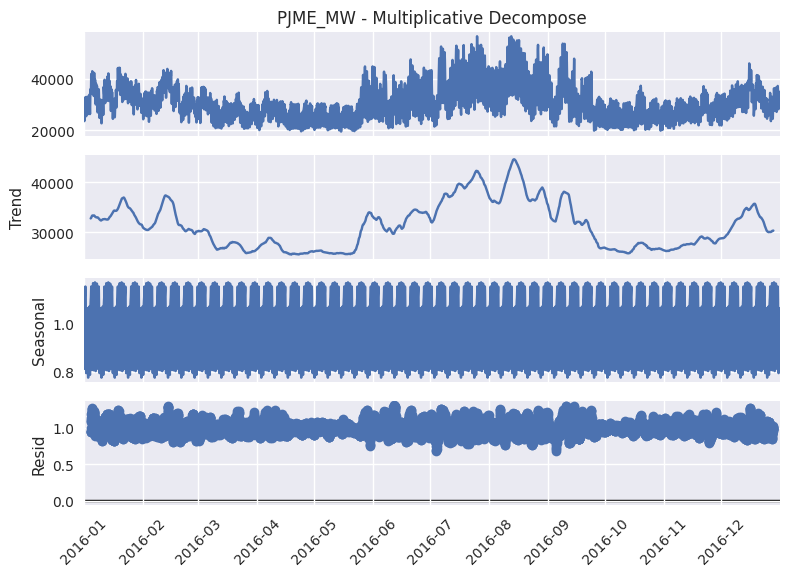

In [30]:
#Step 5: Time Series Decomposition

#Importing relevant modeule
from statsmodels.tsa.seasonal import seasonal_decompose

df_plot = df[df['year'] == 2016].reset_index()
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

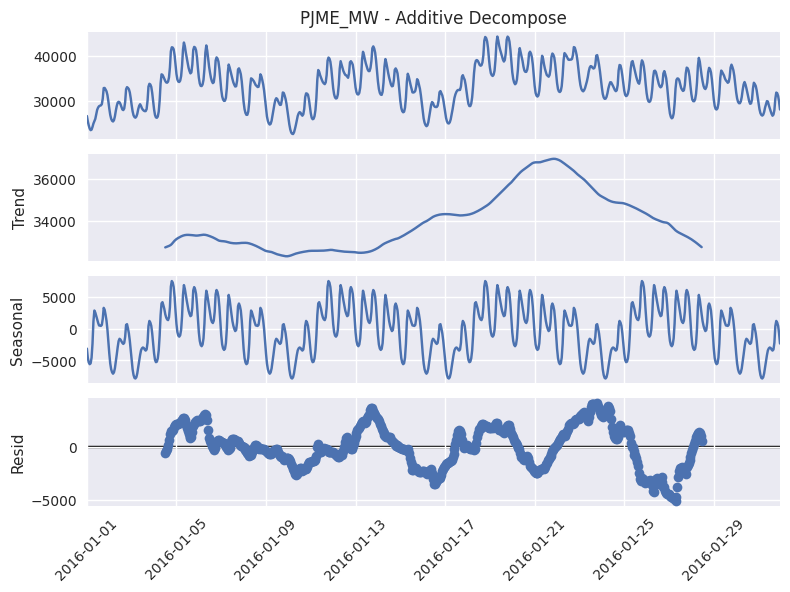

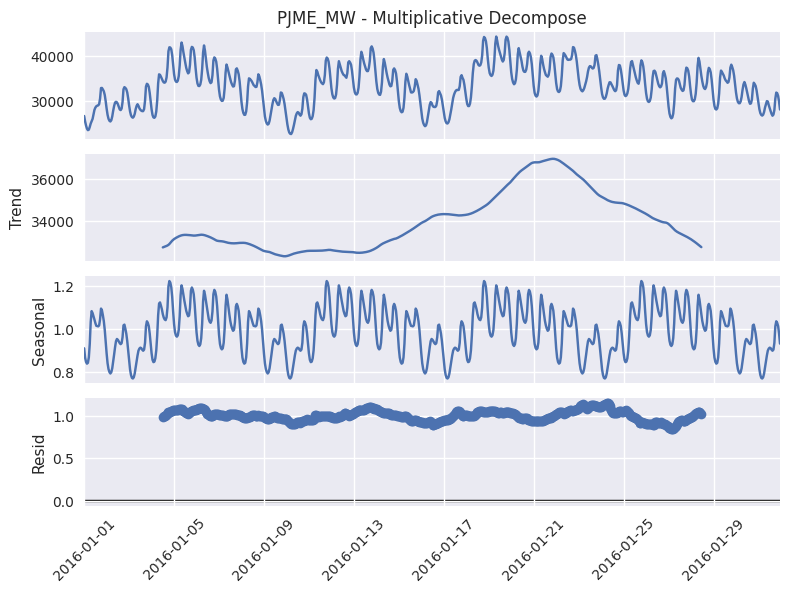

In [31]:
df_plot = df[(df['year'] == 2016)].reset_index()
df_plot = df_plot[df_plot['month'] == 1]
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')
df_plot = df_plot.set_index('Datetime')

# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()


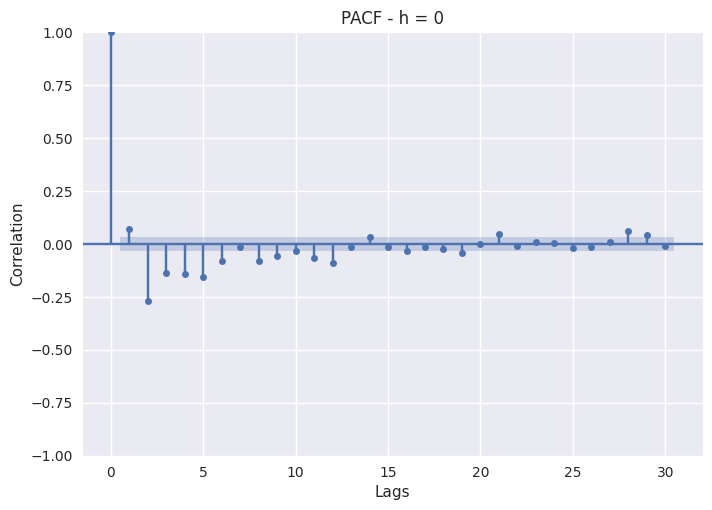

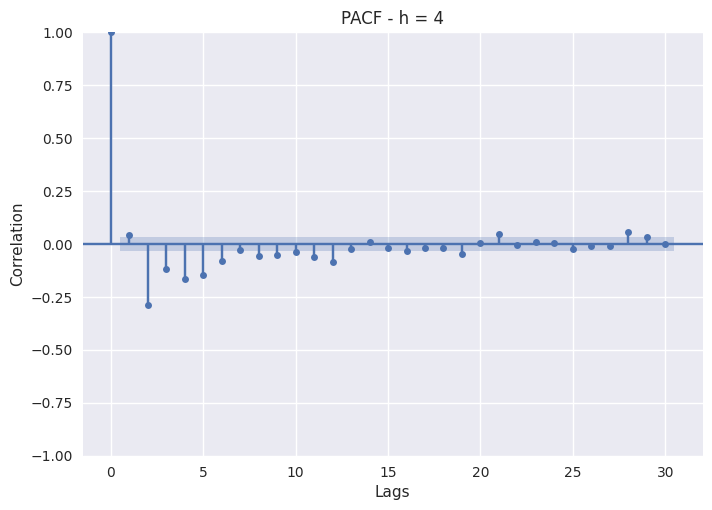

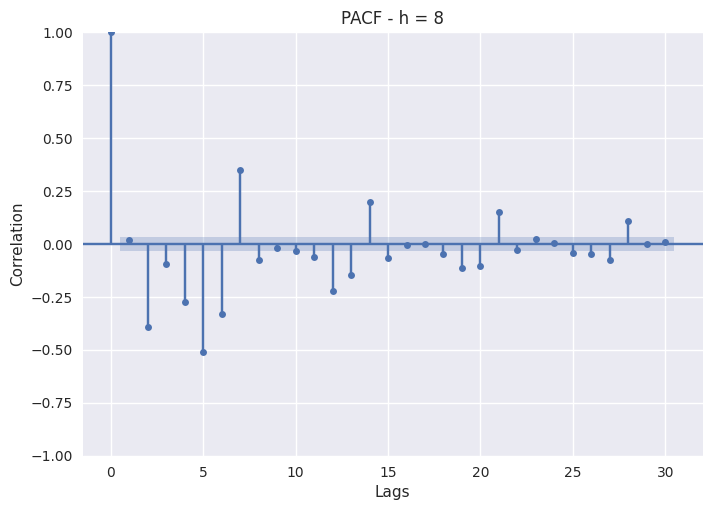

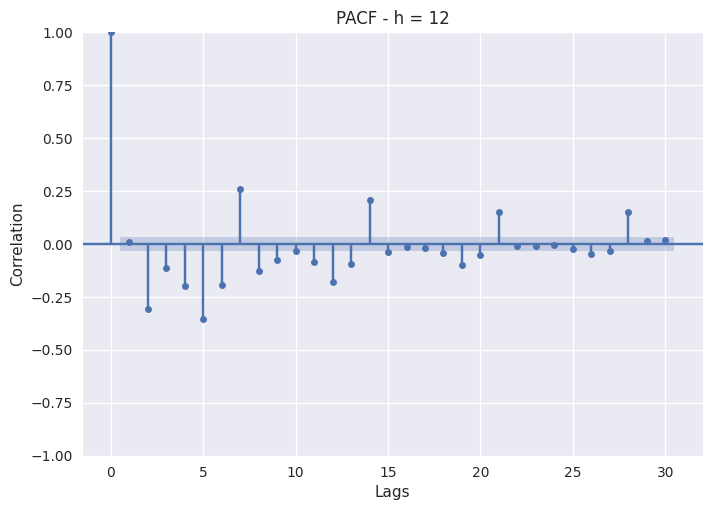

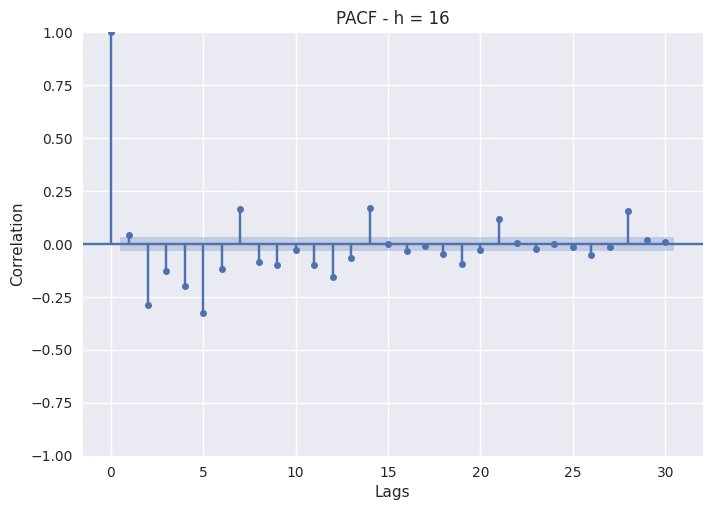

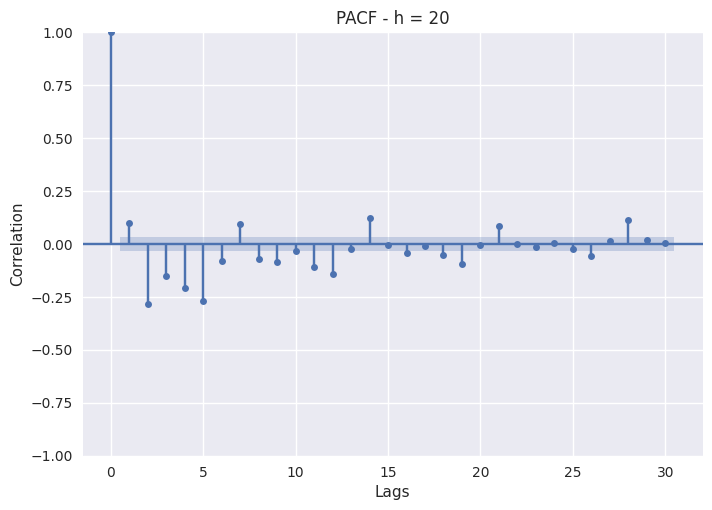

In [27]:
#Step 6: Lag Analysis
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours = range(0, 24, 4)

for hour in hours:
    plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags=30, alpha=0.01)
    plt.title(f'PACF - h = {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()